# Derivatives

## 1. Mathematical definition of a derivative

\\( f'(x)=\lim_{h\rightarrow 0}\frac{f(x+h)-f(x)}{h}\\)

\\( f'(x)=\lim_{h\rightarrow 0}\frac{f(x)-f(x-h)}{h}\\)

\\( f'(x)=\lim_{h\rightarrow 0}\frac{f(x+h)-f(x-h)}{2h}\\)

All three definitions are equivalent in case of a continuous function.

## 2. Numerical implementation of first-order derivatives

Forward differences
\\( f'(x_n)\approx\frac{f(x_{n+1})-f(x_n)}{x_{n+1}-x_n}\\)

Backward differences
\\( f'(x)\approx\frac{f(x_n)-f(x_{n-1})}{x_n-x_{n-1}}\\)

Central differences
\\( f'(x)\approx\frac{f(x_{n+1})-f(x_{n-1})}{x_{n+1}-x_{n-1}}\\)

### Example function: \\( f(x)=\sin(x)x-\frac{1}{100}x^3 \\)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def f(x):
    return np.sin(x)*x - 1/100*x**3

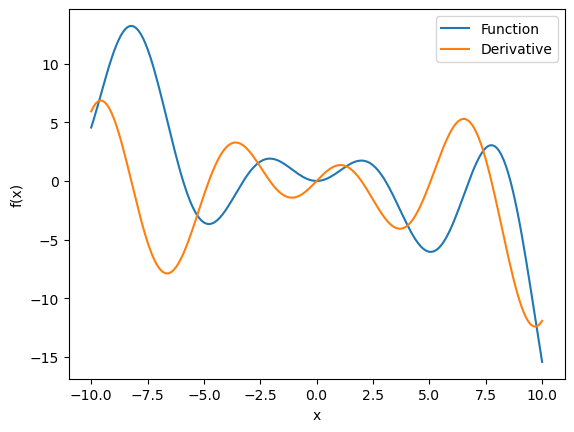

In [13]:
# Solving the derivative analytically

x_list = np.linspace(-10,10,201)

analytical_derivative = np.cos(x_list)*x_list + np.sin(x_list) - 3/100*x_list**2

plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x_list, f(x_list), label='Function')
plt.plot(x_list, analytical_derivative, label = 'Derivative')
plt.legend()

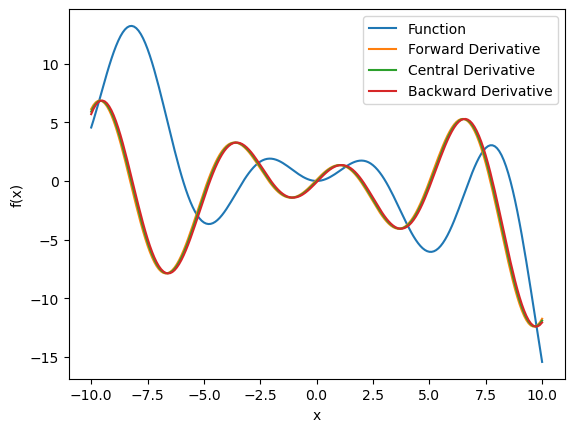

In [20]:
h = 0.1

forward_derivative = ( f(x_list+h) - f(x_list) ) / h
backward_derivative = ( f(x_list) - f(x_list-h) ) / h
central_derivative = ( f(x_list+h) - f(x_list-h) ) / (2*h)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x_list, f(x_list), label='Function')
plt.plot(x_list, forward_derivative, label = 'Forward Derivative')
plt.plot(x_list, central_derivative, label = 'Central Derivative')
plt.plot(x_list, backward_derivative, label = 'Backward Derivative')

plt.legend()

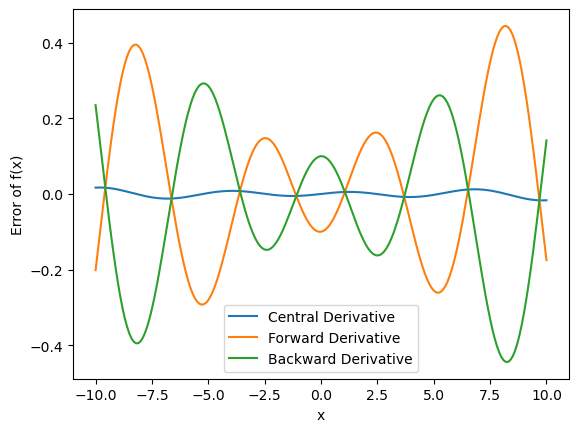

In [21]:
# Looking at the errors
# Central has the lowest errors

plt.xlabel('x')
plt.ylabel('Error of f(x)')

plt.plot(x_list, analytical_derivative - central_derivative, label = 'Central Derivative')
plt.plot(x_list, analytical_derivative - forward_derivative, label = 'Forward Derivative')
plt.plot(x_list, analytical_derivative - backward_derivative, label = 'Backward Derivative')

plt.legend()

### Why is central differences (typically) better than forward and backward differences?

Forward differences
\\( f'(x)=\frac{f(x+h)-f(x)}{h}+\mathcal{O}(h)\\)

Backward differences
\\( f'(x)=\frac{f(x)-f(x-h)}{h}+\mathcal{O}(h)\\)

Central differences
\\( f'(x)=\frac{f(x+h)-f(x-h)}{2h}+\mathcal{O}(h^2)\\)

- \\(\mathcal{O}(h^n)\\) means that the error is proportional to h^n.
- Since \\(h\\) is small, the central differences method is more accurate. Why?

Taylor expansion: 

\\(f(x+h)=f(x)+f'(x)h+\frac{1}{2}f''(x)h^2+\frac{1}{6}f'''(x)h^3+\dots\\)

\\(f(x-h)=f(x)-f'(x)h+\frac{1}{2}f''(x)h^2-\frac{1}{6}f'''(x)h^3\pm\dots\\)

- From the first and second line we can imediately see the  \\(\mathcal{O}(h)\\) dependence of the forward and backward differences methods

\\(f'(x)=\frac{1}{h}\left[f(x+h)-f(x)-\frac{1}{2}f''(x)h^2-\frac{1}{6}f'''(x)h^3+\dots\right]=\frac{f(x+h)-f(x)}{h}-\frac{1}{2}f''(x)h-\frac{1}{6}f'''(x)h^2+\dots\\)

\\(f'(x)=\frac{1}{h}\left[f(x)-f(x-h)+\frac{1}{2}f''(x)h^2-\frac{1}{6}f'''(x)h^3\pm\dots\right]=\frac{f(x)-f(x-h)}{h}+\frac{1}{2}f''(x)h-\frac{1}{6}f'''(x)h^2\pm\dots\\)


- To find the \\(\mathcal{O}(h^2)\\) dependence of the central differences method, we have to subtract the two terms

\\(f(x+h)-f(x-h)=2f'(x)h+\frac{1}{3}f'''(x)h^3+\dots\\)

\\(\frac{1}{2h}\left[f(x+h)-f(x-h)\right]=f'(x)+\frac{1}{6}f'''(x)h^2+\dots\\)

\\( f'(x)=\frac{f(x+h)-f(x-h)}{2h}+\mathcal{O}(h^2)\\)

### Higher accuracy:

Richardson: \\(f'(x)=\frac{1}{12h}\left[f(x-2h)-8f(x-h)+8f(x+h)-f(x+2h)\right]+\mathcal{O}(h^4)\\)

In [22]:
def D1Richardson(f, x, h):
    return 1/(12*h) * ( f(x-2*h) - 8*f(x-h) + 8*f(x+h) - f(x+2*h) )

## 3. Second derivatives

We derive \\(f'(x)\\) another time

\\( f''(x)=\lim_{h\rightarrow 0}\frac{f'(x+h)-f'(x)}{h}\\)

\\( f''(x)=\lim_{h\rightarrow 0}\frac{f'(x)-f'(x-h)}{h}\\)

\\( f''(x)=\lim_{h\rightarrow 0}\frac{f'(x+h)-f'(x-h)}{2h}\\)

This gives us many possibilities for the definition of \\(f''(x)\\) based on \\(f(x)\\), e. g.

- Double forward & double backward

\\(f''(x)=\lim_{h\rightarrow 0}\frac{\left[f(x+2h)-f(x+h)\right]-\left[f(x+h)-f(x)\right]}{h^2}=\lim_{h\rightarrow 0}\frac{f(x+2h)-2f(x+h)+f(x)}{h^2}\\)

\\(f''(x)=\lim_{h\rightarrow 0}\frac{\left[f(x)-f(x-h)\right]-\left[f(x-h)-f(x-2h)\right]}{h^2}=\lim_{h\rightarrow 0}\frac{f(x)-2f(x-h)+f(x-2h)}{h^2}\\)

- Forward and backward

\\(f''(x)=\lim_{h\rightarrow 0}\frac{\left[f(x+h)-f(x)\right]-\left[f(x)-f(x-h)\right]}{h^2}=\lim_{h\rightarrow 0}\frac{f(x+h)-2f(x)+f(x-h)}{h^2}\\)

- Double central (same result as forward and backward for \\(2h=g\\))

\\(f''(x)=\lim_{h\rightarrow 0}\frac{\left[f(x+2h)-f(x)\right]-\left[f(x)-f(x-2h)\right]}{(2h)^2}=\lim_{h\rightarrow 0}\frac{f(x+2h)-2f(x)+f(x-2h)}{4h^2}=\lim_{g\rightarrow 0}\frac{f(x+g)-2f(x)+f(x-g)}{g^2}\\)

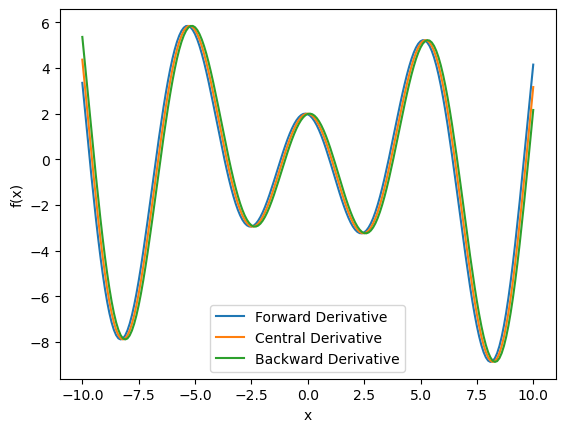

In [25]:
analytical_derivative2 = -np.sin(x_list)*x_list + 2*np.cos(x_list) - 6/100*x_list


h = 0.1

forward_derivative2 = ( f(x_list+2*h) - 2*f(x_list+h) + f(x_list) ) / h**2
backward_derivative2 = ( f(x_list) - 2*f(x_list-h) + f(x_list-2*h) ) / h**2
central_derivative2 = ( f(x_list + h) - 2*f(x_list) + f(x_list-h) ) / h**2

plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x_list, forward_derivative2, label = 'Forward Derivative')
plt.plot(x_list, central_derivative2, label = 'Central Derivative')
plt.plot(x_list, backward_derivative2, label = 'Backward Derivative')

plt.legend()

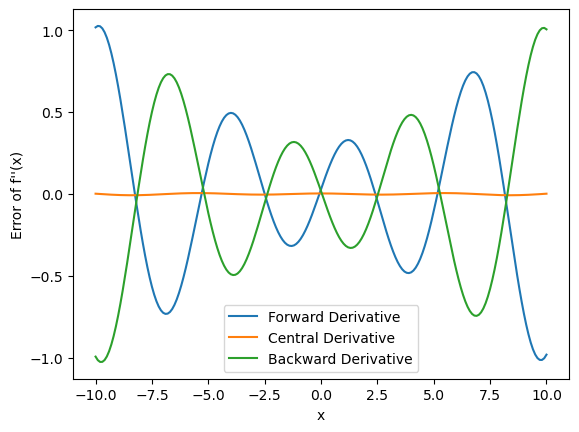

In [29]:
plt.xlabel('x')
plt.ylabel("Error of f''(x)")
plt.plot(x_list, analytical_derivative2 - forward_derivative2, label = 'Forward Derivative')
plt.plot(x_list, analytical_derivative2 - central_derivative2, label = 'Central Derivative')
plt.plot(x_list, analytical_derivative2 - backward_derivative2, label = 'Backward Derivative')

plt.legend()

### Higher accuracy:

Richardson: \\(f''(x)=\frac{1}{12h^2}\left[-f(x-2h)+16f(x-h)-30f(x)+16f(x+h)-f(x+2h)\right]+\mathcal{O}(h^4)\\)

In [27]:
def D2Richardson(f, x, h):
    return 1/(12*h**2) * ( -f(x-2*h) + 16*f(x-h) - 30*f(x) + 16*f(x+h) - f(x+2*h) )

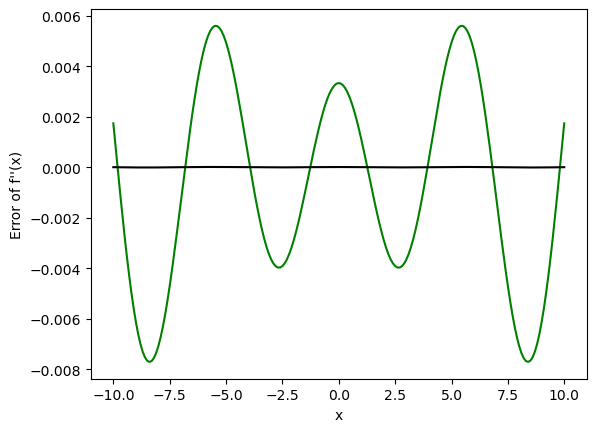

In [30]:
plt.xlabel('x')
plt.ylabel("Error of f''(x)")

richardson_derivative2 = D2Richardson(f, x_list, h)

plt.plot(x_list, analytical_derivative2 - central_derivative2, 'green')
plt.plot(x_list, analytical_derivative2 - richardson_derivative2, 'black')

## 4. Gradient, Divergence & Curl

Now we consider a multidimensional function which means, the function depends on multiple variables 

\\( f(x,y,z)\\)

or it is a function that has multiple dimensions itself

\\( \vec{g}(x,y,z)=\begin{pmatrix}g_x(x,y,z)\\g_y(x,y,z)\\g_z(x,y,z)\end{pmatrix}\\)

With the nabla operator \\( \nabla = \begin{pmatrix}\frac{\partial}{\partial x}\\\frac{\partial}{\partial y}\\\frac{\partial}{\partial z}\end{pmatrix}\\) we can calculate:

- gradient \\( \nabla f(x,y,z) = \begin{pmatrix}\frac{\partial}{\partial x}f(x,y,z)\\\frac{\partial}{\partial y}f(x,y,z)\\\frac{\partial}{\partial z}f(x,y,z)\end{pmatrix}\\)

- curl \\(\nabla\times \vec{g}(x,y,z) = \begin{pmatrix}
\frac{\partial}{\partial y}g_z(x,y,z) - \frac{\partial}{\partial z}g_y(x,y,z)\\
\frac{\partial}{\partial z}g_x(x,y,z) - \frac{\partial}{\partial x}g_z(x,y,z)\\
\frac{\partial}{\partial x}g_y(x,y,z) - \frac{\partial}{\partial y}g_x(x,y,z)\\
\end{pmatrix}\\)

- divergence \\(\nabla\cdot \vec{g}(x,y,z) = \frac{\partial}{\partial x}g_x(x,y,z)+\frac{\partial}{\partial y}g_y(x,y,z)+\frac{\partial}{\partial z}g_z(x,y,z)\\)

### Example 

\\(
f(\vec{r})=f(x,y,z) = \exp(-x^2-y^4)
\\)

\\(
\vec{g}(\vec{r})=\frac{\vec{r}}{r}=\begin{pmatrix}x/\sqrt{x^2+y^2+z^2}\\y/\sqrt{x^2+y^2+z^2}\\z/\sqrt{x^2+y^2+z^2}\end{pmatrix}
\\)

In [31]:
def f(r):
    return np.exp(-r[0]**2-r[1]**4)

def g(r):
    return r / np.linalg.norm(r)

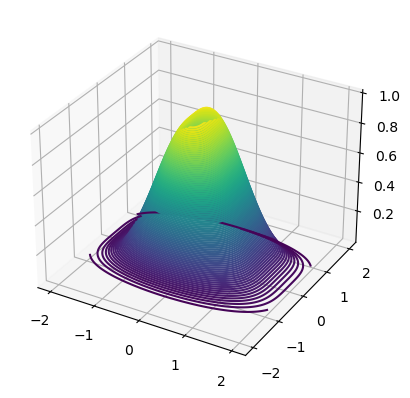

In [32]:
x3, y3 = np.meshgrid(np.linspace(-2,2,201),np.linspace(-2,2,201))
z3 = f( np.array([ x3, y3 ]) )

plotproj = plt.axes(projection='3d')
plotproj.contour3D(x3,y3,z3,100)

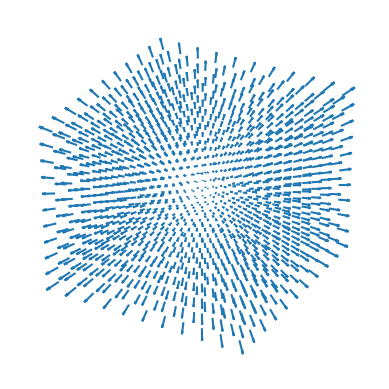

In [33]:
x3, y3, z3 = np.meshgrid(np.linspace(-2,2,11),np.linspace(-2,2,11),np.linspace(-2,2,11))
values = g( np.array([ x3, y3, z3 ]) )

arrowplot = plt.axes(projection='3d')
arrowplot.axis(False)

scale=7
arrowplot.quiver(
    x3, y3, z3,
    values[0]*scale,values[1]*scale,values[2]*scale
)

### Gradient

In [36]:
# Direction of the steepest slope of the mountain

def gradient(f,r,h):
    x,y,z = r
    partialx = (f(np.array([x+h,y,z])) - f(np.array([x-h,y,z]))) / (2*h)
    partialy = (f(np.array([x,y+h,z])) - f(np.array([x,y-h,z]))) / (2*h)
    partialz = (f(np.array([x,y,z+h])) - f(np.array([x,y,z-h]))) / (2*h)
    
    return np.array([ partialx, partialy, partialz])

In [37]:
r = np.array([0.5,-1.2,-8])
h = 0.0001

gradient(f, r, h)

array([-0.09792044,  0.67682606,  0.        ])

### Divergence

In [38]:
def divergence(g,r,h):
    x,y,z = r
    dgxdx = ( g(np.array([x+h,y,z]))[0] - g(np.array([x-h,y,z]))[0] ) / (2*h)
    dgydy = ( g(np.array([x,y+h,z]))[1] - g(np.array([x,y-h,z]))[1] ) / (2*h)
    dgzdz = ( g(np.array([x,y,z+h]))[2] - g(np.array([x,y,z-h]))[2] ) / (2*h)
    return dgxdx + dgydy + dgzdz

In [39]:
divergence(g,r,h)

0.24676318364020428

### Curl

In [40]:
def curl(g,r,h):
    x,y,z = r
    dgxdy = ( g(np.array([x,y+h,z]))[0] - g(np.array([x,y-h,z]))[0] ) / (2*h)
    dgxdz = ( g(np.array([x,y,z+h]))[0] - g(np.array([x,y,z-h]))[0] ) / (2*h)
    dgydx = ( g(np.array([x+h,y,z]))[1] - g(np.array([x-h,y,z]))[1] ) / (2*h)
    dgydz = ( g(np.array([x,y,z+h]))[1] - g(np.array([x,y,z-h]))[1] ) / (2*h)
    dgzdx = ( g(np.array([x+h,y,z]))[2] - g(np.array([x-h,y,z]))[2] ) / (2*h)
    dgzdy = ( g(np.array([x,y+h,z]))[2] - g(np.array([x,y-h,z]))[2] ) / (2*h)
    return np.array([ dgzdy-dgydz, dgxdz-dgzdx, dgydx-dgxdy ])

In [41]:
curl(g,r,h)

array([ 6.80011603e-12,  3.08780779e-12, -2.08166817e-13])